In [1]:
import  numpy as np
import pandas as pd
import  matplotlib.pyplot as plt


#그래프에 한글 표현하기
import  matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family = font_name)

#마이너스 표시하기
import  matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]  = False


import  seaborn as sns

import folium

In [9]:
#지역화폐 결제정보 데이터 불러오기
df = pd.read_csv("경기도 수원시_지역화폐 결제 정보_20201211.csv", encoding="cp949")


,기준년월,시군구명,읍면동명,성별,연령대,업종명,결제건수,결제금액,데이터기준일자
3332,2020-11,영통구,영통동,남,10대,건강식품,1,248000,2020-12-11
3333,2020-11,영통구,영통동,남,10대,기타,1,2500,2020-12-11
3334,2020-11,영통구,영통동,남,10대,기타의료기관,1,15000,2020-12-11
3335,2020-11,영통구,영통동,남,10대,레져업소,228,953600,2020-12-11
3336,2020-11,영통구,영통동,남,10대,레져용품,9,74700,2020-12-11
...,...,...,...,...,...,...,...,...,...
127677,2019-04,영통구,영통동,여,40대,일반·휴게음식,19,446000,2020-12-11
127678,2019-04,영통구,영통동,여,40대,학원,1,90000,2020-12-11
127679,2019-04,영통구,영통동,여,50대,약국,1,7500,2020-12-11
127680,2019-04,영통구,영통동,여,50대,음료식품,1,12500,2020-12-11


In [14]:
#동 종류 확인
df["읍면동명"].unique()

array(['고색동', '곡반정동', '구운동', '권선동', '금곡동', '당수동', '대황교동', '서둔동', '세류동',
       '오목천동', '입북동', '장지동', '탑동', '평동', '평리동', '호매실동', '망포동', '매탄동',
       '신동', '영통동', '원천동', '이의동', '하동', '상광교동', '송죽동', '연무동', '영화동',
       '율전동', '이목동', '정자동', '조원동', '천천동', '파장동', '하광교동', '고등동', '교동',
       '구천동', '남수동', '남창동', '매교동', '매산로1가', '매산로2가', '매산로3가', '매향동',
       '북수동', '신풍동', '영동', '우만동', '인계동', '장안동', '중동', '지동', '팔달로1가',
       '팔달로2가', '팔달로3가', '화서동'], dtype=object)

In [25]:
#매산로, 팔달로 변경
df["읍면동명"] = df["읍면동명"].replace(['매산로1가', '매산로2가', '매산로3가'],"매산동")

df["읍면동명"] = df["읍면동명"].replace(['팔달로1가','팔달로2가', '팔달로3가'],"행궁동")

In [59]:
#동별 결제금액 합계 추출
df_pay = df.groupby("읍면동명", as_index = False).sum()
df_pay = df_pay.rename(columns={"읍면동명":"동명"})
df_pay

,동명,결제건수,결제금액
0,고등동,58712,1007247549
1,고색동,173166,4166650041
2,곡반정동,163686,2848145504
3,교동,34180,682728188
4,구운동,158672,3476111530
5,구천동,11321,169038411
6,권선동,709045,15284696237
7,금곡동,544789,11559944550
8,남수동,15533,336815701
9,남창동,16537,348945831


In [46]:
#df_ind = 상권개수 파악 데이터
df_ind = pd.read_csv("전처리완성본/지역화페 전처리 완성본.csv")
df_ind.head()

,상호명,업종명,업종대분류,업종소분류,소재지도로명주소,소재지지번주소,동명,우편번호,위도,경도
0,#먹빵,일반휴게음식-일반한식,일반휴게음식,일반한식,"경기 수원시 팔달구 권광로180번길 41,1층 (인계동)",경기도 수원시 팔달구 인계동 1121-10번지 1층,인계동,16488.0,37.263201,127.035101
1,(CPC)켈리포니아피자치킨 수원연무점,일반휴게음식-서양음식,일반휴게음식,서양음식,"경기 수원시 장안구 월드컵로429번길 17,1층 (연무동)",경기도 수원시 장안구 연무동 258-23번지 1층,연무동,16221.0,37.293042,127.024989
2,(Cafe)화서문 41-1,일반휴게음식-서양음식,일반휴게음식,서양음식,경기 수원시 팔달구 화서문로 41-1화서문 CAFE (장안동),경기도 수원시 팔달구 장안동 286-2번지 화서문 CAFE,장안동,16250.0,37.285348,127.012617
3,(MOOㅇO)무,일반휴게음식-서양음식,일반휴게음식,서양음식,"경기 수원시 장안구 금당로89번길 8,1층 (조원동)",경기도 수원시 장안구 조원동 456-17번지 1층,조원동,16280.0,37.301359,127.019814
4,(愛):사랑,일반휴게음식-일반한식,일반휴게음식,일반한식,"경기 수원시 팔달구 경수대로495번길 19(인계동,1층)",경기도 수원시 팔달구 인계동 965-18번지 1층,인계동,16481.0,37.270424,127.026642


In [112]:
#pd.DataFrame()
df_count = pd.DataFrame(df_ind.groupby("동명").size())
df_count = df_count.reset_index().rename(columns = {0:"상권개수"})
df_count


,동명,상권개수
0,고등동,146
1,고색동,231
2,곡반정동,263
3,교동,59
4,구운동,255
5,구천동,8
6,권선동,827
7,금곡동,455
8,남수동,61
9,남창동,42


In [118]:
#결제데이터 전처리 완선본 과 상군데이터 전처리 왕성본 merge
df_ano = pd.merge(df_pay, df_count, on="동명")
df_ano

,동명,결제건수,결제금액,상권개수
0,고등동,58712,1007247549,146
1,고색동,173166,4166650041,231
2,곡반정동,163686,2848145504,263
3,교동,34180,682728188,59
4,구운동,158672,3476111530,255
5,구천동,11321,169038411,8
6,권선동,709045,15284696237,827
7,금곡동,544789,11559944550,455
8,남수동,15533,336815701,61
9,남창동,16537,348945831,42


In [116]:
df_ano.to_csv("전처리완성본/아노바.csv")

In [28]:
df_ano = pd.read_csv("전처리완성본/아노바.csv")

In [26]:
#인구데이터 불러오기
data = pd.read_excel("전처리완성본/2020년12월말기준.xls")[["동","인구_계"]]
data["동"] = data["동"].str.replace("1|2|3|4","")
pop = data.groupby("동", as_index=False).sum().rename(columns ={"동":"동명"})
pop

,동명,인구_계
0,고등동,9191
1,곡선동,27498
2,광교동,82262
3,구운동,24793
4,권선동,74405
5,금곡동,45833
6,망포동,60048
7,매교동,5988
8,매산동,10677
9,매탄동,91797


In [37]:
#인구데이터 합치기 및 전처리 완성본
df_anova = pd.merge(df_ano, pop, on="동명").iloc[:,1:].rename(columns={"인구_계":"인구"})
df_anova.to_csv("전처리완성본/anova전처리완성본.csv")
df_anova

,동명,결제건수,결제금액,상권개수,인구
0,고등동,58712,1007247549,146,9191
1,구운동,158672,3476111530,255,24793
2,권선동,709045,15284696237,827,74405
3,금곡동,544789,11559944550,455,45833
4,망포동,427988,9317367319,236,60048
5,매교동,76889,792724593,49,5988
6,매산동,290285,5413152822,476,10677
7,매탄동,933051,17439978053,1009,91797
8,서둔동,73177,1174059877,93,38247
9,세류동,291376,5247274724,492,53403


In [42]:
np.corrcoef(df_anova["결제금액"], df_anova["상권개수"])

array([[1.       , 0.8818365],
       [0.8818365, 1.       ]])

In [56]:
#주차장

park = pd.read_csv("전처리완성본/토지지목별 현황 전처리 완성본.csv")[["동","주차장","주차장면적/대지(%)"]]
park.rename(columns={"동":"동명"},inplace=True)
park.head()

,동명,주차장,주차장면적/대지(%)
0,고등동,1382,0.22
1,고색동,32969,4.09
2,곡반정동,35627,9.44
3,교동,0,0.00
4,구운동,3767,0.56


In [58]:
df_anova = pd.merge(df_anova,  park, on="동명")

In [61]:
np.corrcoef(df_anova["결제금액"], df_anova["주차장면적/대지(%)"])

array([[ 1.        , -0.22796178],
       [-0.22796178,  1.        ]])

In [62]:
df_anova.to_csv("전처리완성본/anova전처리완성본.csv")

In [74]:
df_anova.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   동명           25 non-null     object 
 1   결제건수         25 non-null     int64  
 2   결제금액         25 non-null     int64  
 3   상권개수         25 non-null     int64  
 4   인구           25 non-null     int64  
 5   주차장          25 non-null     int64  
 6   주차장면적/대지(%)  25 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.6+ KB


In [64]:
df_anova.columns

Index(['동명', '결제건수', '결제금액', '상권개수', '인구', '주차장', '주차장면적/대지(%)'], dtype='object')

In [69]:
###상관관계 파악
cols = ['결제건수', '결제금액', '상권개수', '인구', '주차장', '주차장면적/대지(%)']
ation = df_anova[cols].corr(method='pearson')
ation

,결제건수,결제금액,상권개수,인구,주차장,주차장면적/대지(%)
결제건수,1.000000,0.976950,0.864413,0.872170,0.052750,-0.254032
결제금액,0.976950,1.000000,0.881836,0.835231,0.041185,-0.227962
상권개수,0.864413,0.881836,1.000000,0.636492,0.029984,-0.271207
인구,0.872170,0.835231,0.636492,1.000000,0.259764,0.004262
주차장,0.052750,0.041185,0.029984,0.259764,1.000000,0.627966
주차장면적/대지(%),-0.254032,-0.227962,-0.271207,0.004262,0.627966,1.000000


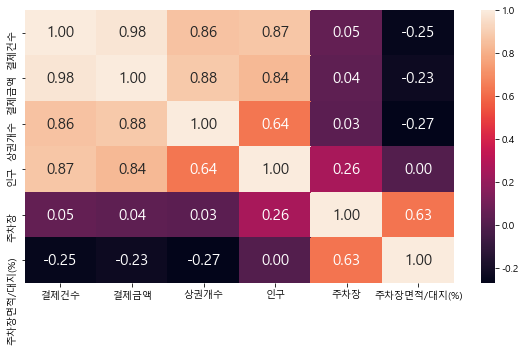

In [73]:
#3-1히트맵 처리
#사이즈 조절
fig=plt.figure(figsize=(8,5))
ax=fig.gca()

#히트맵 설정
hm=sns.heatmap(ation.values, annot=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols, 
xticklabels=cols, ax=ax)

#타이트하게 표를 보여줘라
plt.tight_layout()
plt.show()